In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from scipy.stats import zscore
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.anova import _get_covariance,anova_lm
from statsmodels.formula.api import ols

### Question 1

In [2]:
salary=pd.read_csv('SalaryData.csv')

In [3]:
salary.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [4]:
salary.shape

(40, 3)

In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


## 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

We have a total of three variables:
1. Education  (Type: Categorical)
2. Salary     (Type: Continuous)
3. Occupation (Type: Categorical)

The dependent variable is   : Salary
The independent variable is : Education & Occupation

### Hypothesis for Education vs Salary

- H0 : Salary is equal across different education groups.
- H1 : Atleast one of the means of Salary variable with respect to Education is unequal across different education groups.


### Hypothesis for Occupation vs Salary

- H0 : Salary is equal across different occupation groups.
- H1 : Atleast one of the means of Salary variable with respect to Occupation is unequal across different occupation groups.


## 1.2 Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

We assume significance value to be 0.05.

In [6]:
formula = 'Salary ~ C(Education)'
model = ols(formula, salary).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


The p value is less than 0.05.

Hence we reject the null hypothesis.

H1 : Atleast one of the means of Salary variable with respect to Education is unequal across different education groups.

## 1.3 Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [7]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, salary).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


The p value is greater than 0.05.

Hence we fail to reject the null hypothesis.

H1 : Atleast one of the means of Salary variable with respect to Occupation is unequal across different occupation groups.

## 1.4 If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result

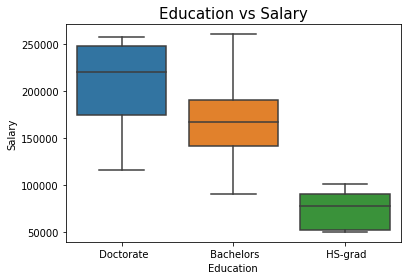

In [8]:
a = sns.boxplot(x= "Education", y = 'Salary', data = salary)
a.set_title("Education vs Salary",fontsize=15)
plt.show()

The mean salaries of all educational qualifications are varied. The mean salary of high school graduates are trhe most varied.

From the box plot, we can interpret that the salary for a person is highly dependent on their educational qualification.

## 1.5 What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.


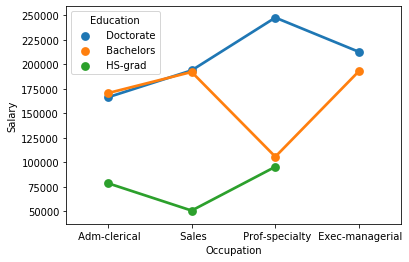

In [9]:
sns.pointplot(x='Occupation', y='Salary', hue='Education', data=salary,ci=None)
plt.show()

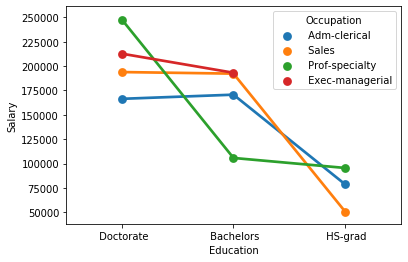

In [10]:
sns.pointplot(x='Education', y='Salary', hue='Occupation', data=salary,ci=None)
plt.show()

From the above two interaction plots, we can observe that there is an interaction between the two variables Education and Occupation.

### Observations
1. More the educational qualification, higher the salary
2. A person with doctorate as his/her educational qualification and works in Prof-speciality recieves the highest salary.
3. A person with HS grad as his/her educational qualification and works in Sales recieves the lowest salary.
4. The salary increase for a person working in Prof-speciality with bachelors degree and doctorate degree is huge.
5. The salary increase for a person working in sales with bachelors degree and HS grad is huge.
6. There is not much salary difference between a person with a bachelors degree and a doctorate degree working in Adm-clerical.
7. There is not much salary difference between a person with a bachelors degree and a doctorate degree working in sales.

## 1.6 Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?
Formulate the hypothesis of ANOVA with both Education and Occupation variables with respect to the variable Salary

- H0 : The means of Salary with respect to the interaction of both Education and Occupation is equal.
- H1 : Atleast one of the means of Salary with respect to the interaction of both Education and Occupation category is unequal.

In [11]:
formula = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula, salary).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq          F        PR(>F)
C(Education)    2.0  1.026955e+11  5.134773e+10  31.257677  1.981539e-08
C(Occupation)   3.0  5.519946e+09  1.839982e+09   1.120080  3.545825e-01
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN


The p value of Education is less than 0.05. So it is a significant factor.
The p value of Occupation is greater than 0.05. So it is not a significant factor.

Next we measure the interaction effect.

In [12]:
model=ols('Salary~C(Education)+C(Occupation)+C(Education):C(Occupation)',data=salary).fit()
aov_table=anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


We can observe that the interaction between Education and Occupation is less than 0.05. There is an interaction

Occupation as a separate individual variable is giving a different interpretation.

Hence we reject the null hypothesis.

H1 : Atleast one of the means of Salary with respect to the interaction of both Education and Occupation category is unequal.

Occupation individually does not have a significant impact on salary.
Both Education & Occupation as variables in combination play a significant part in determining the salary.


## 1.7 Explain the business implications of performing ANOVA for this particular case study.

ANOVA helps us to identify the independent factors which can explain the variation obtained in the response variable. 

In our case study, we observe that:
1. Education has a significant impact on Salary
2. Occupation does not have a significant impact on salary.
3. The interaction of Education & Occupation has a significant impact on salary.
4. More the educational qualification, higher the salary
5. A person with doctorate as his/her educational qualification and works in Prof-speciality recieves the highest salary.
6. A person with HS grad as his/her educational qualification and works in Sales recieves the lowest salary.
7. The salary increase for a person working in Prof-speciality with bachelors degree and doctorate degree is huge.
8. The salary increase for a person working in sales with bachelors degree and HS grad is huge.
9. There is not much salary difference between a person with a bachelors degree and a doctorate degree working in Adm-clerical.
10. There is not much salary difference between a person with a bachelors degree and a doctorate degree working in sales.